<a href="https://colab.research.google.com/github/Nwosu-Ihueze/bag_classifier/blob/main/model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_dir = ('/content/drive/MyDrive/image_classifier/dataset')

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [8]:
data_args = dict(rescale=1./255, validation_split=.20)

In [10]:
bag_train = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

train_gen = bag_train.flow_from_directory(
img_dir,
subset="training",
shuffle=True,
target_size=(224, 224))

Found 1600 images belonging to 5 classes.


In [11]:
bag_val = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

val_gen = bag_val.flow_from_directory(
img_dir,
subset="validation",
shuffle=True,
target_size=(224, 224))

Found 400 images belonging to 5 classes.


In [13]:
print (train_gen.class_indices)

{'Backpack': 0, 'Briefcase': 1, 'Duffle': 2, 'Handbag': 3, 'Purse': 4}


In [16]:
labels = '\n'.join(sorted(train_gen.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)
!cat labels.txt

Backpack
Briefcase
Duffle
Handbag
Purse

In [30]:
bag_model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(train_gen.num_classes, activation='softmax')
])
bag_model.build([None, 224, 224, 3])

In [31]:
bag_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [32]:
opt = tf.keras.optimizers.Adam(lr=0.001)
bag_model.compile(
 optimizer=opt,
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [33]:
epochs=10
history = bag_model.fit(
  train_gen,
  validation_data = val_gen,
  epochs = epochs
)


Epoch 1/10
50/50 [==============================] - 811s 16s/step - loss: 1.7522 - accuracy: 0.3116 - val_loss: 1.3164 - val_accuracy: 0.5175
Epoch 2/10
50/50 [==============================] - 77s 2s/step - loss: 1.0749 - accuracy: 0.6146 - val_loss: 1.1530 - val_accuracy: 0.6000
Epoch 3/10
50/50 [==============================] - 77s 2s/step - loss: 0.8486 - accuracy: 0.6952 - val_loss: 1.1514 - val_accuracy: 0.5875
Epoch 4/10
50/50 [==============================] - 77s 2s/step - loss: 0.5616 - accuracy: 0.8050 - val_loss: 1.5793 - val_accuracy: 0.5425
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 0.3418 - accuracy: 0.8894 - val_loss: 1.3500 - val_accuracy: 0.6025
Epoch 6/10
50/50 [==============================] - 77s 2s/step - loss: 0.1746 - accuracy: 0.9524 - val_loss: 1.6087 - val_accuracy: 0.5775
Epoch 7/10
50/50 [==============================] - 78s 2s/step - loss: 0.1010 - accuracy: 0.9810 - val_loss: 1.8598 - val_accuracy: 0.5750
Epoch 8/10
50/50 [

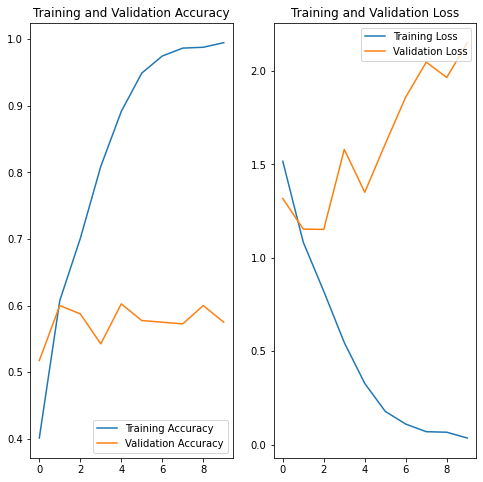

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()